In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

from kagglehub import KaggleDatasetAdapter

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn import tree


In [2]:
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sandhyapeesara/cloud-anomaly-data",
  "Cloud_Anomaly_Dataset.csv"
)

In [3]:
df1 = df.dropna(subset=['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
                   'num_executed_instructions', 'execution_time', 'energy_efficiency', 'task_type', 'task_priority', 'task_status'])
df1 = df1.drop(columns=['vm_id', 'timestamp'])

le = LabelEncoder()
for col in ['task_type', 'task_priority', 'task_status']:
    df1[col] = le.fit_transform(df1[col])

In [4]:
df1.isna().sum()

cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type                    0
task_priority                0
task_status                  0
Anomaly status               0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96575 entries, 0 to 277568
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cpu_usage                  96575 non-null  float64
 1   memory_usage               96575 non-null  float64
 2   network_traffic            96575 non-null  float64
 3   power_consumption          96575 non-null  float64
 4   num_executed_instructions  96575 non-null  float64
 5   execution_time             96575 non-null  float64
 6   energy_efficiency          96575 non-null  float64
 7   task_type                  96575 non-null  int64  
 8   task_priority              96575 non-null  int64  
 9   task_status                96575 non-null  int64  
 10  Anomaly status             96575 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 8.8 MB


In [6]:
df1.describe()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
count,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000,96575.000000
mean,49.941954,50.023685,500.079580,249.970328,4998.895625,50.158866,0.501306,1.003955,0.997877,0.999969,0.058690
std,28.853738,28.846078,288.148974,144.747522,2882.400506,28.881790,0.288495,0.816077,0.816990,0.816968,0.235045
min,0.000133,0.001100,0.007070,0.010746,0.000000,0.000172,0.000004,0.000000,0.000000,0.000000,0.000000
25%,24.853494,25.126526,250.714507,123.845160,2505.000000,25.211206,0.250964,0.000000,0.000000,0.000000,0.000000
50%,49.849728,49.937211,499.640299,250.640866,4988.000000,50.171894,0.502286,1.000000,1.000000,1.000000,0.000000
75%,75.016496,74.999841,749.437892,375.756892,7490.000000,75.291971,0.751413,2.000000,2.000000,2.000000,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998381,0.999990,2.000000,2.000000,2.000000,1.000000


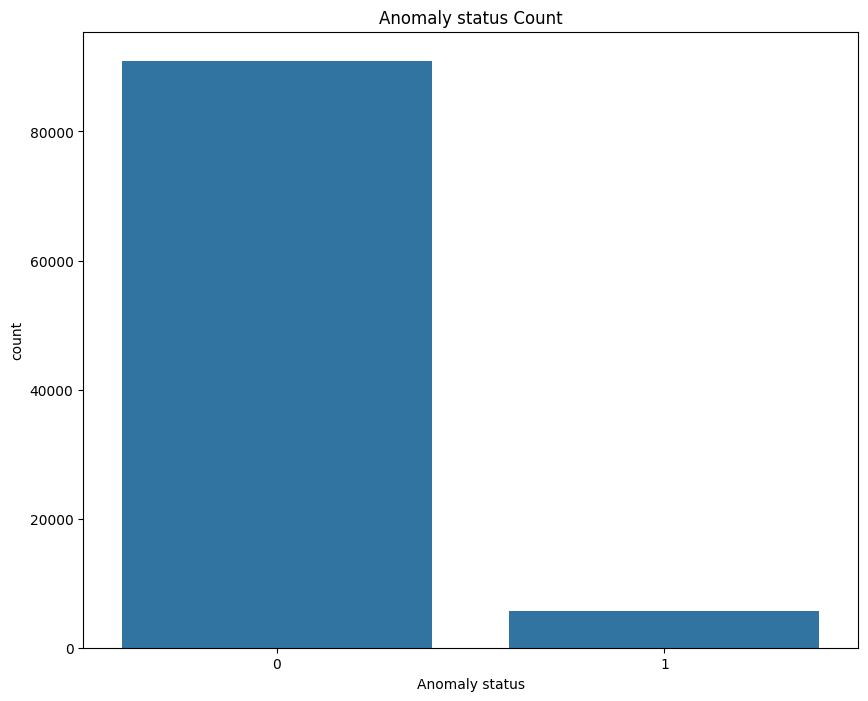

In [8]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Anomaly status',data=df1)
plt.title("Anomaly status Count")
plt.show()

In [9]:
df1['Anomaly status'].value_counts()

Anomaly status
0    90907
1     5668
Name: count, dtype: int64

In [23]:
y_target = df1['Anomaly status']
x_data = df1.drop(['Anomaly status'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.20)

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20)
clf = clf.fit(x_train,y_train)

#Evaluación en el conjunto de prueba
y_pred = clf.predict(x_test)

print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(clf.score(x_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

print(classification_report(y_test, y_pred))
print(x_data.columns)

Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.93
[[17890   239]
 [ 1143    43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18129
           1       0.15      0.04      0.06      1186

    accuracy                           0.93     19315
   macro avg       0.55      0.51      0.51     19315
weighted avg       0.89      0.93      0.91     19315

Index(['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
       'num_executed_instructions', 'execution_time', 'energy_efficiency',
       'task_type', 'task_priority', 'task_status'],
      dtype='object')
